<a href="https://colab.research.google.com/github/AlexeySergeychuk/GB-Python/blob/lesson6/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [31]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
boston = load_boston()

In [13]:
data = boston.data

In [14]:
target = boston.target

In [17]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
for line in boston.DESCR.split('\n'):
  print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

создаем два датафрейма


In [20]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
X.shape

(506, 13)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [27]:
y = pd.DataFrame(target, columns=['Price'])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [30]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбиваем данные на тестовый и проверочный датасеты

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [32]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = lr.predict(X_test)

In [40]:
chek_test = pd.DataFrame({'y_test': y_test['Price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [41]:
chek_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test, y_pred)

0.7112260057484974

#Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [73]:
parameters = [{'n_estimators': [1000], 
               'max_features': np.arange(5,9),
               'max_depth': np.arange(5,12)}]

In [74]:
model = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                     param_grid=parameters,
                     scoring='r2',
                     cv=5)

In [75]:
model.fit(X_train, y_train.values[:,0])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [76]:
model.best_params_

{'max_depth': 11, 'max_features': 5, 'n_estimators': 1000}

In [80]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for means, stds, params in zip(means, stds, model.cv_results_['params']):
  print('%0.3f (+/-%0.03f) for %r' % (means, stds * 2, params))

0.822 (+/-0.131) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 1000}
0.825 (+/-0.137) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 1000}
0.824 (+/-0.145) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 1000}
0.821 (+/-0.156) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 1000}
0.832 (+/-0.126) for {'max_depth': 6, 'max_features': 5, 'n_estimators': 1000}
0.831 (+/-0.137) for {'max_depth': 6, 'max_features': 6, 'n_estimators': 1000}
0.828 (+/-0.146) for {'max_depth': 6, 'max_features': 7, 'n_estimators': 1000}
0.828 (+/-0.149) for {'max_depth': 6, 'max_features': 8, 'n_estimators': 1000}
0.833 (+/-0.131) for {'max_depth': 7, 'max_features': 5, 'n_estimators': 1000}
0.834 (+/-0.133) for {'max_depth': 7, 'max_features': 6, 'n_estimators': 1000}
0.830 (+/-0.144) for {'max_depth': 7, 'max_features': 7, 'n_estimators': 1000}
0.830 (+/-0.148) for {'max_depth': 7, 'max_features': 8, 'n_estimators': 1000}
0.837 (+/-0.128) for {'max_depth': 8, 'max_features'

In [87]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8715881666822094

**Рандом форест** показал результат **намного лучше** чем линейная регрессия.


#Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [89]:
?RandomForestRegressor

In [103]:
X, y = train_test_split(n_features=4, n_informative=2, random_state=0, shuffle=False)

ValueError: ignored

In [104]:

regr = RandomForestRegressor()


Не смог сделать задание :(

#Дополнительные задания:
##1). 
Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.


In [108]:
from sklearn.datasets import load_wine 

In [115]:
data = load_wine()


**2).** Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.


In [116]:
type(data)

sklearn.utils.Bunch

In [121]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

**3).** Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.


In [131]:
for i in data.DESCR:
  print(i, end='')

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**5)**. На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [135]:
X = pd.DataFrame(data=data.data, columns=feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**6).** Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [136]:
X.size

2314

In [137]:
X.shape

(178, 13)

In [140]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

**7).** Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [146]:
X['target'] = data['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [147]:
X['target'].astype(np.int64)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [148]:
X['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

**8).** Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [152]:
from matplotlib import pyplot as plt
import matplotlib.image as img
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')


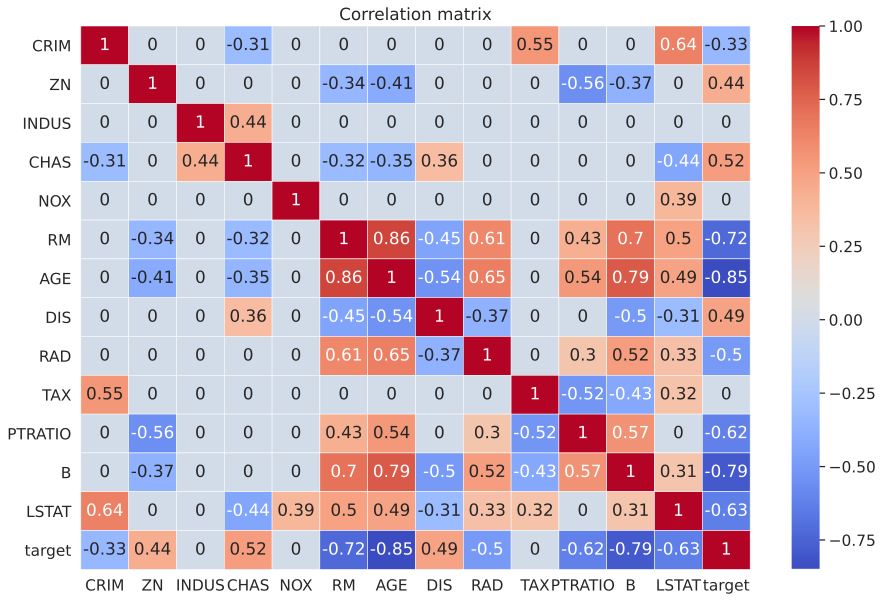

In [154]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

X_corr = X.corr()
X_corr = np.round(X_corr, 2)
X_corr[np.abs(X_corr) < 0.3] = 0

sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**9).** Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [162]:
high_corr = X_corr.loc[(abs(X_corr['target'] > 0.5 ))]
high_corr.drop('target', axis=1, inplace=True)
high_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CHAS,-0.31,0.00,0.44,1.00,0.0,-0.32,-0.35,0.36,0.0,0.0,0.00,0.00,-0.44
target,-0.33,0.44,0.00,0.52,0.0,-0.72,-0.85,0.49,-0.5,0.0,-0.62,-0.79,-0.63


**10).** Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [ ]:
high_corr.drop('target', axis=1, inplace=True)

In [166]:
cols = high_corr.keys()
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [169]:
for i in cols:
  high_corr[f'{i}_2'] = high_corr[f'{i}'] ** 2
high_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_2,ZN_2,INDUS_2,CHAS_2,NOX_2,RM_2,AGE_2,DIS_2,RAD_2,TAX_2,PTRATIO_2,B_2,LSTAT_2
CHAS,-0.31,0.00,0.44,1.00,0.0,-0.32,-0.35,0.36,0.0,0.0,0.00,0.00,-0.44,0.0961,0.0000,0.1936,1.0000,0.0,0.1024,0.1225,0.1296,0.00,0.0,0.0000,0.0000,0.1936
target,-0.33,0.44,0.00,0.52,0.0,-0.72,-0.85,0.49,-0.5,0.0,-0.62,-0.79,-0.63,0.1089,0.1936,0.0000,0.2704,0.0,0.5184,0.7225,0.2401,0.25,0.0,0.3844,0.6241,0.3969
